In [1]:
import os
import tensorflow
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
covid_folder=r'/content/drive/MyDrive/Images/Cov'
normal_folder=r'/content/drive/MyDrive/Images/Nor'

function for image preprocessing

In [37]:
def image_processing(img):
  img=load_img(img,target_size=(256,256))
  img=img_to_array(img)
  img=img/255.0
  return np.array(img)

covid images values convertion

In [38]:
covid_img_values=[]
normal_img_values=[]
covid_outputs=[]
normal_outputs=[]

for i in os.listdir(covid_folder):
  img=os.path.join(covid_folder,i)
  img=image_processing(img)
  covid_img_values.append(img)
  covid_outputs.append(1)

In [53]:
covid_img_values[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        [0.01568628, 0.01568628, 0.01568628],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.23137255, 0.23137255, 0.23137255],
        [0.23137255, 0.23137255, 0.23137255],
        [0.23529412, 0.23529412, 0.23529412],
        ...,
        [0.08235294, 0.08235294, 0.08235294],
        [0.07843138, 0.07843138, 0.07843138],
        [0.07450981, 0.07450981, 0.07450981]],

       ...,

       [[0.42352942, 0.42352942, 0.42352942],
        [0.4392157 , 0.4392157 , 0.4392157 ],
        [0.4392157 , 0

normal imag values convertion

In [40]:
for i in os.listdir(normal_folder):
  img=os.path.join(normal_folder,i)
  img=image_processing(img)
  normal_img_values.append(img)
  normal_outputs.append(0)

In [54]:
normal_img_values[0]

array([[[0.08235294, 0.08235294, 0.08235294],
        [0.07843138, 0.07843138, 0.07843138],
        [0.07843138, 0.07843138, 0.07843138],
        ...,
        [0.6901961 , 0.6901961 , 0.6901961 ],
        [0.7294118 , 0.7294118 , 0.7294118 ],
        [0.69411767, 0.69411767, 0.69411767]],

       [[0.12156863, 0.12156863, 0.12156863],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.13333334, 0.13333334, 0.13333334],
        ...,
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.7137255 , 0.7137255 , 0.7137255 ],
        [0.72156864, 0.72156864, 0.72156864]],

       [[0.15686275, 0.15686275, 0.15686275],
        [0.16862746, 0.16862746, 0.16862746],
        [0.18039216, 0.18039216, 0.18039216],
        ...,
        [0.7294118 , 0.7294118 , 0.7294118 ],
        [0.7254902 , 0.7254902 , 0.7254902 ],
        [0.73333335, 0.73333335, 0.73333335]],

       ...,

       [[0.09411765, 0.09411765, 0.09411765],
        [0.09019608, 0.09019608, 0.09019608],
        [0.08627451, 0

creating the x,y (4-D) for train test split

In [42]:
x=np.concatenate((np.array(covid_img_values),np.array(normal_img_values)))
y=np.concatenate((np.array(covid_outputs),np.array(normal_outputs)))

using train test split function

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

bulding model

In [44]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
model.fit(x_train,y_train,epochs=15)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 5s/step - accuracy: 0.5417 - loss: 4.7605
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.4792 - loss: 2.0869
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6042 - loss: 0.8942
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.4583 - loss: 2.1141
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5833 - loss: 0.8068
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6771 - loss: 0.7165
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.8646 - loss: 0.4925
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8750 - loss: 0.4079
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8229 - loss: 0.3541
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.8438 - loss: 0.3293
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.8958 - loss: 0.2554
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.9688 - loss: 0.2060
Epoch 13/15
2/2 ━━

In [47]:
model.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 0.2834   


[0.28339213132858276, 0.875]

prediction function

In [51]:
def predict_image(img):
  img=load_img(img,target_size=(256,256))
  img=img_to_array(img)
  img=img/255.0
  img = np.expand_dims(img, axis=0)
  prediction=model.predict(img)
  return prediction[0][0]

In [52]:
prediction_image=r'/content/drive/MyDrive/Images/Nor/00001497_000.png'
result=predict_image(prediction_image)
if(result>=0.5):
  print("Covid_found")
else:
  print("covid_not_found")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
covid_not_found


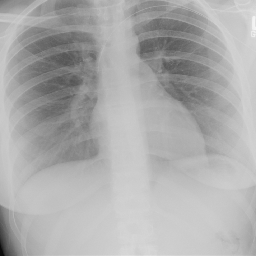

In [56]:
load_img(prediction_image,target_size=(256,256))